In [2]:
from modules.utils import *

In [5]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({'font.size': 15})

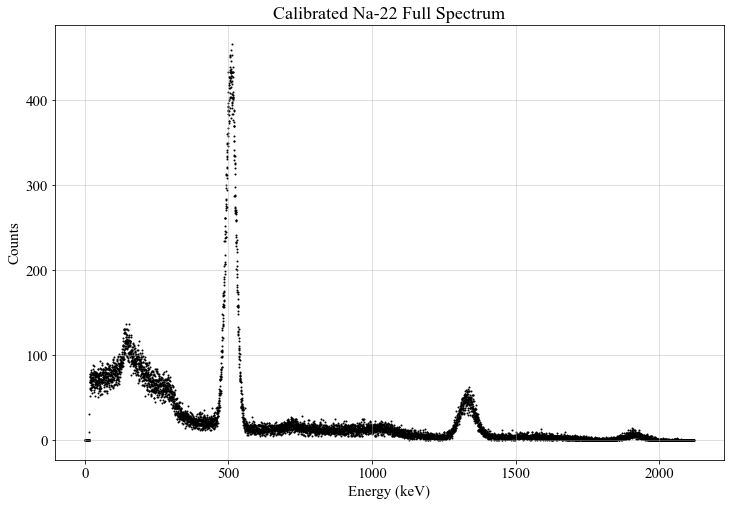

In [6]:
plt.title("Calibrated Na-22 Full Spectrum")
plot_MCA('left_Na_1', True, 511)

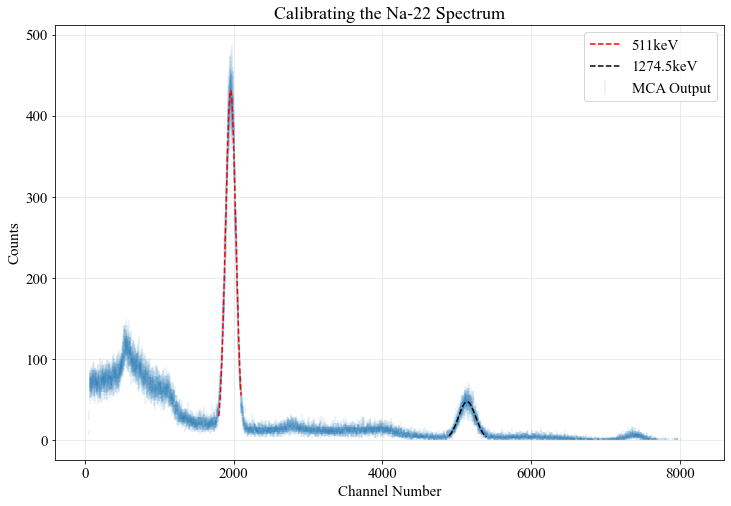

In [23]:
X, Y = pad_counts('left_Na_1')
# plt.scatter(X, Y, s=0.3, alpha=0.05, label='MCA Output')
plt.errorbar(X, Y, yerr=np.sqrt(Y), fmt='none', alpha=0.1, label='MCA Output')
# fitting gaussians on each peak
# first peak
x1 = X[1800:2100]
y1 = Y[1800:2100]
x0 = x1[np.argmax(y1)]
popt1, pcov1 = curve_fit(gaussian, x1, y1, p0=[1, x0, 1])
plt.plot(x1, gaussian(x1, *popt1), 'r--', label='511keV')

# second peak
y2 = Y[4900:5400]
x2 = X[4900:5400]
x0 = x2[np.argmax(y2)]
popt2, pcov2 = curve_fit(gaussian, x2, y2, p0=[1, x0, 1])
plt.plot(x2, gaussian(x2, *popt2), 'k--', label='1274.5keV')

plt.legend()
plt.xlabel('Channel Number')
plt.ylabel('Counts')
plt.title('Calibrating the Na-22 Spectrum')
plt.grid(alpha=0.3)
plt.savefig('fig/others/IdentifyingNaCalibrationPeaks.png', dpi=300)

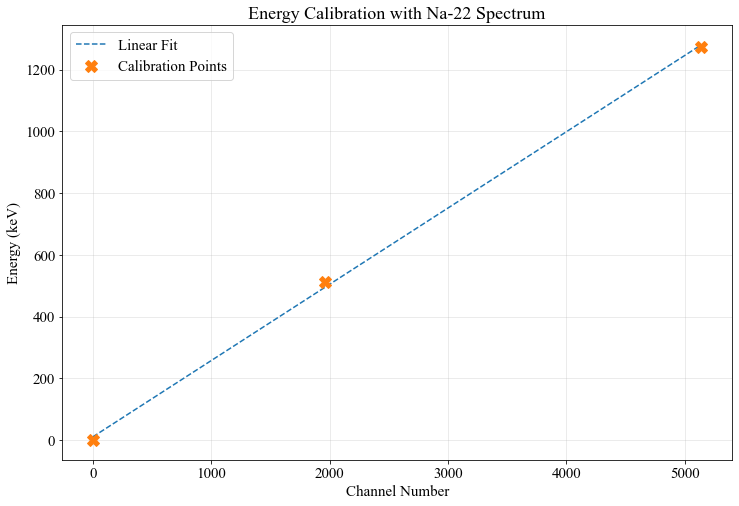

In [41]:
calibration_points = np.array([0, popt1[1], popt2[1]])
known_points = np.array([0, 511, 1274.5])

popt, pcov = curve_fit(linear, calibration_points, known_points, p0=[0.2, 10])
plt.plot(calibration_points, linear(calibration_points, *popt), '--', label='Linear Fit')
plt.plot(calibration_points, known_points, 'X', markersize=12, label='Calibration Points')
plt.legend()
plt.xlabel('Channel Number')
plt.ylabel('Energy (keV)')
plt.title('Energy Calibration with Na-22 Spectrum')
plt.grid(alpha=0.3)
plt.savefig('fig/others/NaEnergyCalibration.png', dpi=300)

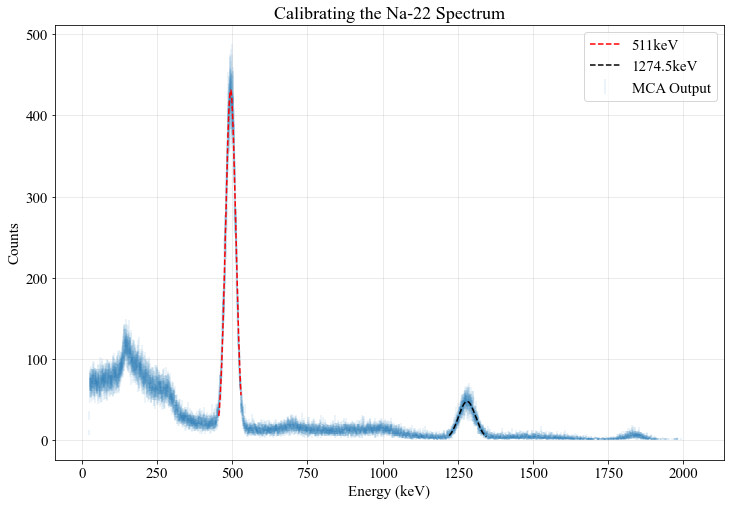

In [42]:
X, Y = pad_counts('left_Na_1')
# plt.scatter(X, Y, s=0.3, alpha=0.05, label='MCA Output')
plt.errorbar(linear(X, *popt), Y, yerr=np.sqrt(Y), fmt='none', alpha=0.1, label='MCA Output')
# fitting gaussians on each peak
# first peak
plt.plot(linear(x1, *popt), gaussian(x1, *popt1), 'r--', label='511keV')

# second peak
plt.plot(linear(x2, *popt), gaussian(x2, *popt2), 'k--', label='1274.5keV')

plt.legend()
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('Calibrating the Na-22 Spectrum')
plt.grid(alpha=0.3)
plt.savefig('fig/others/IdentifyingNaCalibrationPeaks.png', dpi=300)

In [43]:
# finding the uncertaininty of the calibration
# we use the covariance matrix to find the uncertainty in the slope and intercept
print('Scaling Constant of first gaussian peak is ', popt1[0], '+/-', np.sqrt(pcov1[0][0]))
print('Mean of first gaussian peak is ', popt1[1], '+/-', np.sqrt(pcov1[1][1]))
print('Standard Deviation of first gaussian peak is ', popt1[2], '+/-', np.sqrt(pcov1[2][2]))

Scaling Constant of first gaussian peak is  431.2179000868548 +/- 1.9370436441832304
Mean of first gaussian peak is  1960.3619109878596 +/- 0.35648271400915715
Standard Deviation of first gaussian peak is  68.7925136303406 +/- 0.3753528464988011


In [44]:
#repeating for second peak
print('Scaling Constant of second gaussian peak is ', popt2[0], '+/-', np.sqrt(pcov2[0][0]))
print('Mean of second gaussian peak is ', popt2[1], '+/-', np.sqrt(pcov2[1][1]))
print('Standard Deviation of second gaussian peak is ', popt2[2], '+/-', np.sqrt(pcov2[2][2]))

Scaling Constant of second gaussian peak is  47.35135005947811 +/- 0.4535779696438598
Mean of second gaussian peak is  5141.571896244943 +/- 1.2653086574095518
Standard Deviation of second gaussian peak is  114.60351122547226 +/- 1.3292642135428687


In [45]:
print('Slope of calibration is ', popt[0], '+/-', np.sqrt(pcov[0][0]))
print('Intercept of calibration is ', popt[1], '+/-', np.sqrt(pcov[1][1]))

Slope of calibration is  0.2471239994550229 +/- 0.005524797201006965
Intercept of calibration is  10.147238254832283 +/- 17.551927069301442


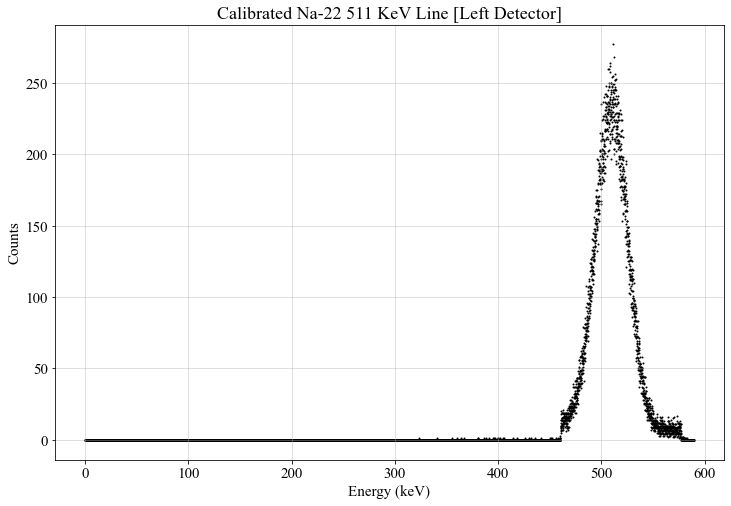

In [10]:
plt.title("Calibrated Na-22 511 KeV Line [Left Detector]")
plot_MCA('left_Na_2_withSCAadjustment', True, 511)

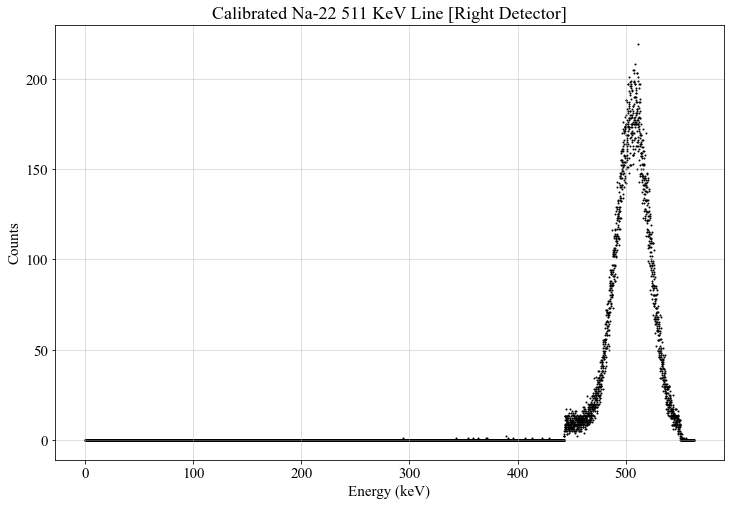

In [11]:
plt.title("Calibrated Na-22 511 KeV Line [Right Detector]")
plot_MCA('right_Na_2_withSCAadjustment', True, 511)

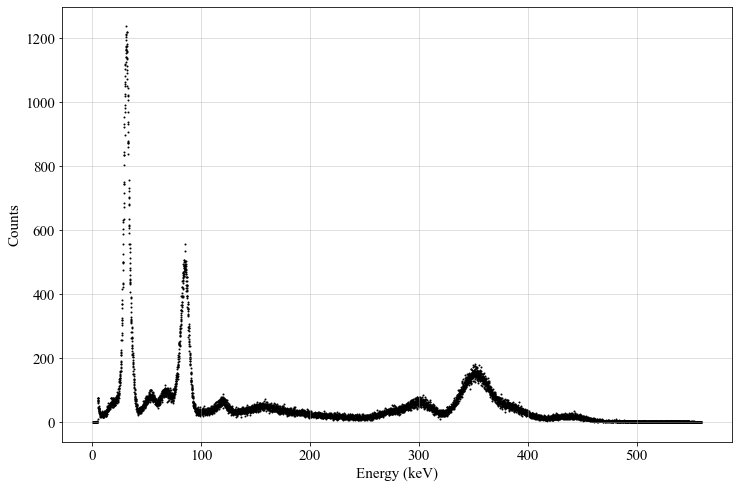

In [12]:
plot_MCA('Ba_Full_Spectrum', True, 31)

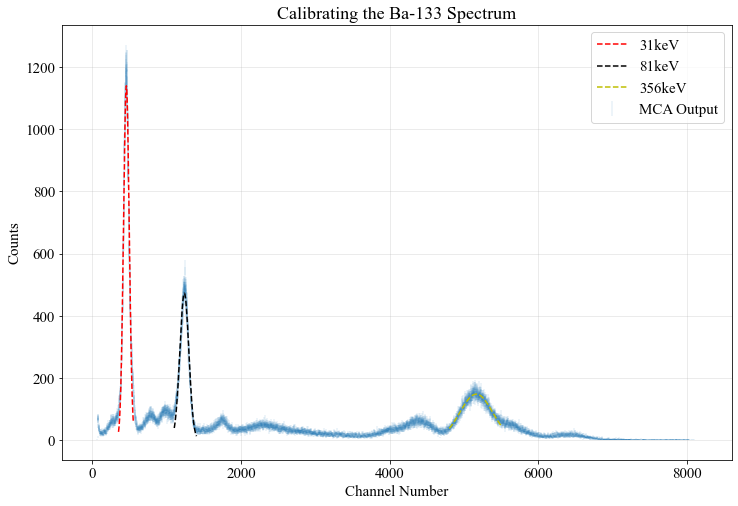

In [46]:
X, Y = pad_counts('Ba_Full_Spectrum')
# plt.scatter(X, Y, s=0.3, alpha=0.05, label='MCA Output')
plt.errorbar(X, Y, yerr=np.sqrt(Y), fmt='none', alpha=0.1, label='MCA Output')
# fitting gaussians on each peak
# first peak
x1 = X[350:550]
y1 = Y[350:550]
x0 = x1[np.argmax(y1)]
popt1, pcov1 = curve_fit(gaussian, x1, y1, p0=[1, x0, 1])
plt.plot(x1, gaussian(x1, *popt1), 'r--', label='31keV')

# second peak
x2 = X[1100:1400]
y2 = Y[1100:1400]
x0 = x2[np.argmax(y2)]
popt2, pcov2 = curve_fit(gaussian, x2, y2, p0=[1, x0, 1])
plt.plot(x2, gaussian(x2, *popt2), 'k--', label='81keV')

# third peak
x3 = X[4800:5500]
y3 = Y[4800:5500]
x0 = x3[np.argmax(y3)]
popt3, pcov3 = curve_fit(gaussian, x3, y3, p0=[1, x0, 1])
plt.plot(x3, gaussian(x3, *popt3), 'y--', label='356keV')

plt.legend()
plt.xlabel('Channel Number')
plt.ylabel('Counts')
plt.title('Calibrating the Ba-133 Spectrum')
plt.grid(alpha=0.3)
plt.savefig('fig/others/IdentifyingBaCalibrationPeaks.png', dpi=300)

In [51]:
print('Scaling Constant of first gaussian peak is ', np.round(popt1[0], 1), '$\pm$', np.round(np.sqrt(pcov1[0][0])))
print('Mean of first gaussian peak is ', np.round(popt1[1], 1), '$\pm$', np.round(np.sqrt(pcov1[1][1])))
print('Standard Deviation of first gaussian peak is ', np.round(popt1[2], 1), '$\pm$', np.round(np.sqrt(pcov1[2][2])))
print('Scaling Constant of second gaussian peak is ', np.round(popt2[0], 1), '$\pm$', np.round(np.sqrt(pcov2[0][0])))
print('Mean of second gaussian peak is ', np.round(popt2[1], 1), '$\pm$', np.round(np.sqrt(pcov2[1][1])))
print('Standard Deviation of second gaussian peak is ', np.round(popt2[2], 1), '$\pm$', np.round(np.sqrt(pcov2[2][2])))
print('Scaling Constant of third gaussian peak is ', np.round(popt3[0], 1), '$\pm$', np.round(np.sqrt(pcov3[0][0])))
print('Mean of third gaussian peak is ', np.round(popt3[1], 1), '$\pm$', np.round(np.sqrt(pcov3[1][1])))
print('Standard Deviation of third gaussian peak is ', np.round(popt3[2], 1), '$\pm$', np.round(np.sqrt(pcov3[2][2])))



Scaling Constant of first gaussian peak is  1139.9 $\pm$ 9.0
Mean of first gaussian peak is  456.4 $\pm$ 0.0
Standard Deviation of first gaussian peak is  38.4 $\pm$ 0.0
Scaling Constant of second gaussian peak is  472.4 $\pm$ 3.0
Mean of second gaussian peak is  1236.5 $\pm$ 0.0
Standard Deviation of second gaussian peak is  60.6 $\pm$ 0.0
Scaling Constant of third gaussian peak is  147.7 $\pm$ 1.0
Mean of third gaussian peak is  5164.3 $\pm$ 1.0
Standard Deviation of third gaussian peak is  219.3 $\pm$ 2.0


In [ ]:
print('Best fit scaling')

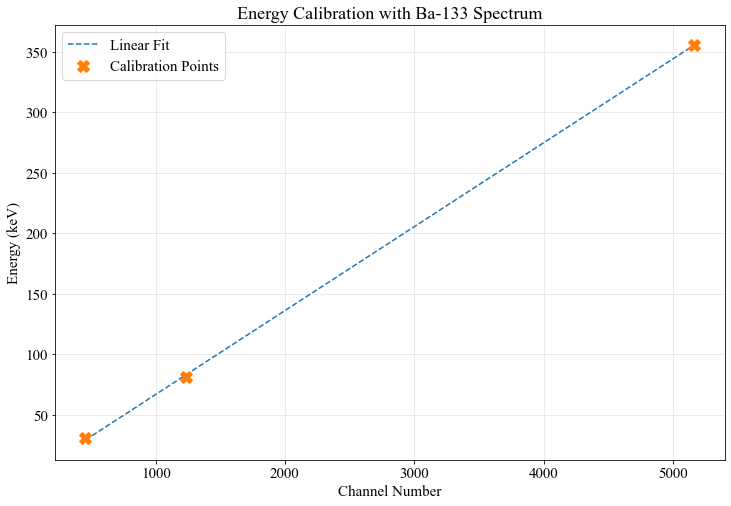

In [52]:
calibration_points = np.array([popt1[1], popt2[1], popt3[1]])
known_points = np.array([31, 81, 356])

popt, pcov = curve_fit(linear, calibration_points, known_points)
plt.plot(calibration_points, linear(calibration_points, *popt), '--', label='Linear Fit')
plt.plot(calibration_points, known_points, 'X', markersize=12, label='Calibration Points')
plt.legend()
plt.xlabel('Channel Number')
plt.ylabel('Energy (keV)')
plt.title('Energy Calibration with Ba-133 Spectrum')
plt.grid(alpha=0.3)
plt.savefig('fig/others/BaEnergyCalibration.png', dpi=300)

In [54]:
print('Slope of calibration is ', np.round(popt[0], 1), '$\pm$', np.round(np.sqrt(pcov[0][0])))
print('Intercept of calibration is ', np.round(popt[1], 1), '$\pm$', np.round(np.sqrt(pcov[1][1])))

Slope of calibration is  0.1 $\pm$ 0.0
Intercept of calibration is  -2.5 $\pm$ 3.0


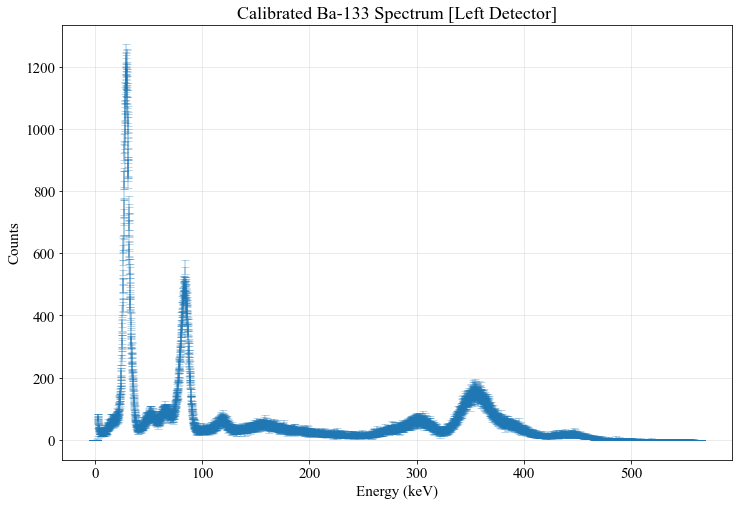

In [56]:
# plt.scatter(linear(X, *popt), Y, s=0.6, alpha=0.8, label='MCA Output')
# adding error bars
Y_err = np.sqrt(Y)
plt.errorbar(linear(X, *popt), Y, yerr=Y_err, fmt='none', markersize=3, capsize=4, alpha=0.3, label='Error')
plt.xlabel('Energy (keV)')
plt.ylabel('Counts')
plt.title('Calibrated Ba-133 Spectrum [Left Detector]')
plt.grid(alpha=0.3)
plt.savefig('fig/calibrated/Ba_Full_Spectrum_calibrated.png', dpi=300)